In [ ]:
## Importing library and reading the data

In [2]:
import pandas as pd
import sys
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
print(sys.path)

['C:\\Users\\info\\PycharmProjects\\JupyterProject', 'C:\\Users\\info\\anaconda3\\python39.zip', 'C:\\Users\\info\\anaconda3\\DLLs', 'C:\\Users\\info\\anaconda3\\lib', 'C:\\Users\\info\\anaconda3', '', 'C:\\Users\\info\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\info\\anaconda3\\lib\\site-packages', 'C:\\Users\\info\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg', 'C:\\Users\\info\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\info\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\info\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\info\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\info\\.ipython']


In [4]:
df = pd.read_csv('C:\\Users\\info\\PycharmProjects\\JupyterProject\\data\\Pokemon.csv')

In [5]:
print(df)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [ ]:
## Conducting correlation analysis

In [30]:
df.corr(method='pearson', min_periods=1).style.background_gradient(cmap="Blues")

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [31]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [32]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
## Checking data skewness by generation

In [35]:
df["Generation"].value_counts(normalize=True)

1    0.20750
5    0.20625
3    0.20000
4    0.15125
2    0.13250
6    0.10250
Name: Generation, dtype: float64

In [36]:
df["Generation"].astype("object")

0      1
1      1
2      1
3      1
4      1
      ..
795    6
796    6
797    6
798    6
799    6
Name: Generation, Length: 800, dtype: object

In [ ]:
## Creating boxplot

<AxesSubplot:title={'center':'Total'}, xlabel='Generation'>

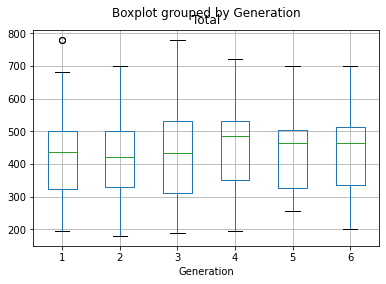

In [37]:
df.boxplot('Total', by='Generation')

In [38]:
df.loc[(df['Generation'] == 3) & (df['Total'] > 700)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [39]:
df['Gen Str'] = df[str('Generation')]

df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Gen Str
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1


In [ ]:
## Conducting ANOVA analysis based on Generation -- Conclusion: fail to reject null hypothesis 
(difference of the Overall status between Generations are by chance)

In [41]:
model = ols('Total ~ Generation', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq     df         F    PR(>F)
Generation  2.691818e+04    1.0  1.872513  0.171573
Residual    1.147160e+07  798.0       NaN       NaN


In [63]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
## Adding another column to clasify pokemon by typing (whether typing is singular or plural/dual)

In [68]:
df['DualType'] = np.where(df['Type 2'].isna(), 0, 1)

In [71]:
df.loc[df['DualType'] == 1]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,DualType
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,1


In [ ]:
#Creating boxplot to observe difference between group

<AxesSubplot:title={'center':'Total'}, xlabel='DualType'>

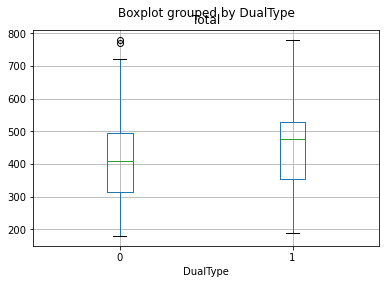

In [75]:
df.boxplot('Total', by='DualType')

In [79]:
df.groupby('DualType').mean()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
DualType,,,,,,,,,,
0,348.064767,412.015544,67.766839,74.525907,67.585492,68.284974,67.974093,65.878238,3.230570,0.064767
1,376.565217,456.628019,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493,3.410628,0.096618


In [ ]:
## Importing more libraries

In [82]:
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
## Conducting levene type to assess homogeneity of variance

In [83]:
stats.levene(SingleType['Total'], MultiType['Total'])

LeveneResult(statistic=0.06580684724450693, pvalue=0.7976089324555451)

In [ ]:
## Creating Q-Q Plot to assess the normality of data distribution

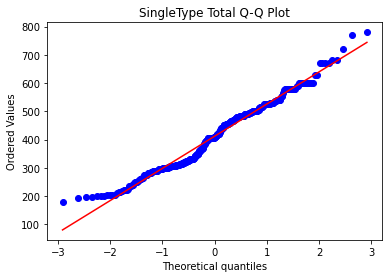

In [84]:
stats.probplot(SingleType['Total'], dist="norm", plot= plt)
plt.title("SingleType Total Q-Q Plot")
plt.savefig("SingleType_qqplot.png")

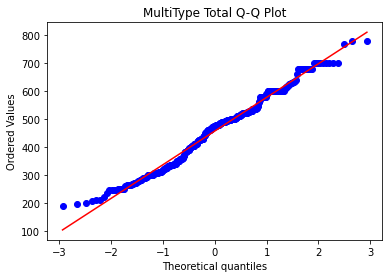

In [85]:
stats.probplot(MultiType['Total'], dist="norm", plot= plt)
plt.title("MultiType Total Q-Q Plot")
plt.savefig("MultiType_qqplot.png")

In [ ]:
## Further test for normality

In [86]:
stats.shapiro(SingleType['Total'])

ShapiroResult(statistic=0.9765270948410034, pvalue=6.597376795980381e-06)

In [87]:
stats.shapiro(MultiType['Total'])

ShapiroResult(statistic=0.9838806986808777, pvalue=0.00014461860700976104)

In [ ]:
## Creating bar plot to see data distribution

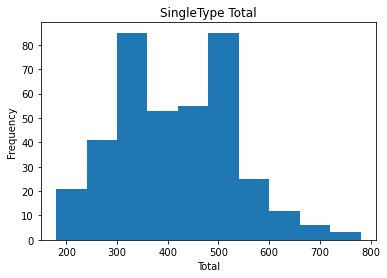

In [88]:
SingleType['Total'].plot(kind="hist", title="SingleType Total")
plt.xlabel("Total")
plt.savefig('SingleType Total Hist')

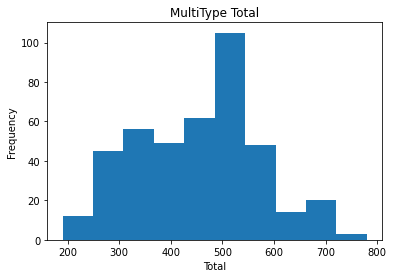

In [89]:
MultiType['Total'].plot(kind="hist", title="MultiType Total")
plt.xlabel("Total")
plt.savefig('MultiType Total Hist')

In [91]:
# T-Test between Single Type and Multi Type

In [90]:
stats.ttest_ind(SingleType['Total'], MultiType['Total'])

Ttest_indResult(statistic=-5.345970873144629, pvalue=1.1749035008828668e-07)